# Supervised Learning

Predict a certain outcome from a given input.

### Classification and Regression

Classification $\to$ Multiclass Classification (binary classification is a particular case).

Regression $\to$ Continuos numerical quantity.

### Generalization, Overfitting and Underfitting

#### Generalization
Build a model on the training set and then be able to make predictions on new data. 

<a href="#/3/1">(Index)</a>

#### Overfitting
Building a model that is too complex for the amount of available information.

#### Underfitting
Choosing a too simple model.

#### Relation of Model Complexity to Dataset Size
Having more data and building appropiately more complex models.
However data alone is not enough.

Always remember:

1. The *curse of dimensionality* and the *blessing of non-uniformity*.

2. No free-lunch theorem.

![png](./images/02-overfitting_underfitting.png)

**Figure 1:** Trade-off of model complexity againts *training* and *test* accuracy.


### Supervised Machine Learning Algorithms

In this first part we are going to explore using examples the main algorithms for supervised
learning:

1\. <a href="#/7/1">k-nearest neighbors (KNN)</a>:
   * for classification.
   * for regression.
   
2\. <a href="#/12/1">Linear Models</a>:
   * <a href="#/13/1">for Regression</a>:
       * Linear regression *aka* least squares.
       * Ridge.
       * Lasso.
       * Elastic Net.
   * <a href="#/18/1">for Classification</a>:
       * Logistic regression.
       * Linear Suppor Vector Machines.
       * Linear models for multiclass classification.

3\. Naive-Bayes Classifiers:
   * GaussianNB
   * BernoulliNB
   * MultinomialNB

4\. Decision Trees:
   * for classification.
   * for regression.
    
5\. Ensembles of Decision Trees:
   * Random Forest.
   * Gradient Boosted Decision Trees.
    
6\. Kernelized Support Vector Machines

### The Abalone dataset

#### The main question:
Predict the age of abalone from physical measurements

#### Data Set Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

#### Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem. 

Name |            Data Type|       Meas.|   Description
-|-|-|-
Sex           |  nominal    |           |  M, F, and I (infant)
Length        |  continuous |     mm    |   Longest shell measurement
Diameter      |  continuous |     mm    |  perpendicular to length
Height        |  continuous |     mm    |  with meat in shell
Whole weight  |  continuous |     grams |  whole abalone
Shucked weight|  continuous |     grams |  weight of meat
Viscera weight|  continuous |     grams |  gut weight (after bleeding)
Shell weight  |  continuous |     grams |  after being dried
Rings         |  integer    |           |  +1.5 gives the age in years

more info [here](https://archive.ics.uci.edu/ml/datasets/Abalone)

In [62]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [169]:
names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv('data/abalone.data',header=None,names=names)

In [170]:
# We add a Years column  
df['Years'] = df['Rings'] + 1.5
# We change the M,F and I categorical variables as numerical using 0,1 and 2.
replace_list = {"Sex" : {"M": 0, "F" : 1, "I": 2}}
df.replace(replace_list,inplace=True)
# We inspect the dataset
#df

In [171]:
# Here we turn into numpy arrays
X = df.iloc[:,:8].values
y_cls = df.iloc[:,8].values
y_reg = df.iloc[:,9].values

# *k*-Nearest Neighbors 

The most intuitive algorithm.

There are two versions:

## *k*-Neighbors for classification and  *k*-Neighbors for regression

<a href="#/3/1">(Index)</a>

![png](./images/02-knns.png)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cls, random_state=0)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)

In [81]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [82]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.24


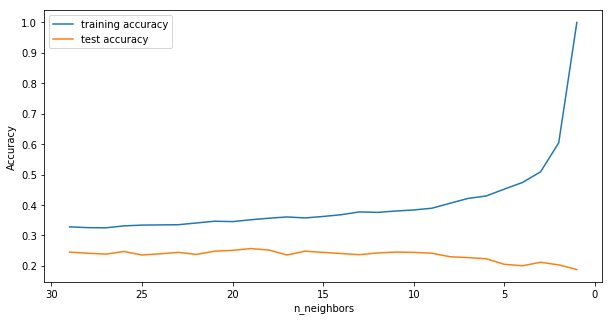

In [84]:
#Abalon Dataset

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15
neighbors_settings = list(range(1, 30))
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(10,5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.gca().invert_xaxis()
plt.legend()

In [85]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, random_state=0)
reg = KNeighborsRegressor(n_neighbors=10)

In [86]:
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [87]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.56


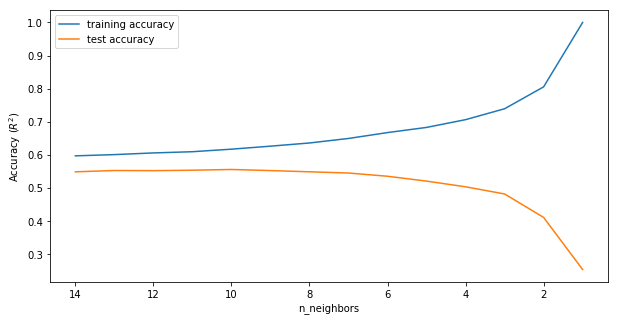

In [88]:
# Abalon dataset

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15
neighbors_settings = list(range(1, 15))
for n_neighbors in neighbors_settings:
# build the model
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(reg.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(reg.score(X_test, y_test))

plt.figure(figsize=(10,5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy ($R^2$)")
plt.xlabel("n_neighbors")
plt.gca().invert_xaxis()
plt.legend()

## Conclusions on the *KNN* algorithms

* Two important parameters: the number of neighbors and how you measure the distance between points. By default is the Minkowski with p=2.

$$ d(\mathbf{x},\mathbf{y}) = \left[\sum_{i=1}^N (x_i - y_i)^p \right]^{\frac{1}{p}} $$

* It is a model easy to understand. But its perform is poor on large datasets (either in number of features or in number of samples).





asasasas

# Linear Models

Linear models make a prediction using a linear function of the input features.


## Linear models for regression and linear models for classification.

$$\hat{y}(\mathbf{w},\mathbf{x}) = w_0 +  w_1 * x_1 + w_2 * x_2 + ... + w_p * x_p $$

<a href="#/3/1">(Index)</a>

## Linear Models for Regression

   * Ordinary Least squares
   $$ \underset{w}{min\,} {|| X w - y||_2}^2  $$
      
   * Ridge (L2 regularization)
   $$  \underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2} $$
   
   * Lasso (L1 regularization)
   $$ \underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1} $$
   
   
If $X$ is a matrix of size $(n, p)$ this methods have a cost of $O(n p^2)$, assuming that $n \geq p$.

   * Elastic Net (L2 and L1 regularization)
   $$ \underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2} $$


In [134]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.53
Test set score: 0.54


In [135]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.53
Test set score: 0.54


In [136]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.48
Test set score: 0.51


In [137]:
ridge01 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.53
Test set score: 0.54


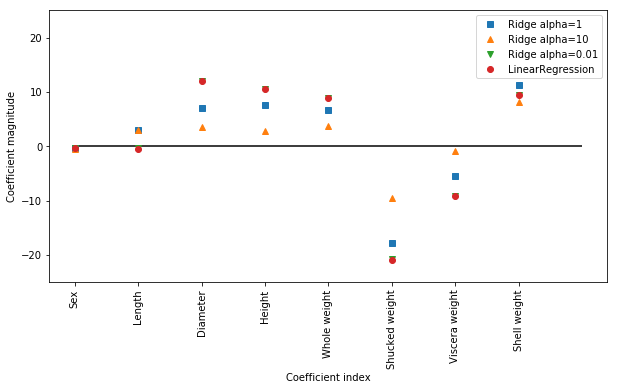

In [191]:
plt.figure(figsize=(10,5))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.01")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xticks(range(len(names)-1), names, rotation=90)
plt.hlines(0, 0, range(len(names)-1))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [139]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import learning_curve, KFold


def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(
        est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                    label="training " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
             label="test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)


def plot_ridge_n_samples(X,y,alpha=1):
    plot_learning_curve(Ridge(alpha=alpha), X, y)
    plot_learning_curve(LinearRegression(), X, y)
    plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

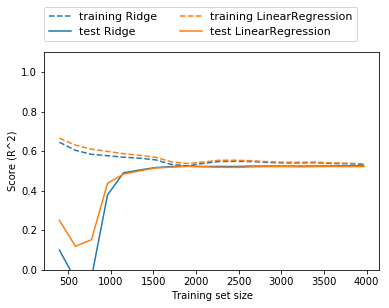

In [140]:
# Learning curves
plot_ridge_n_samples(X,y_reg,alpha=1)

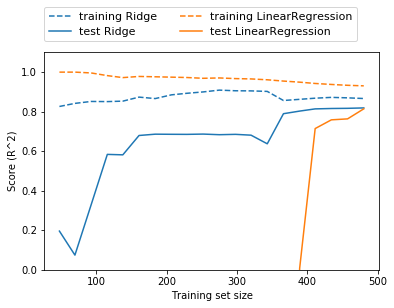

In [141]:
X_b, y_b = mglearn.datasets.load_extended_boston()
plot_ridge_n_samples(X_b,y_b,alpha=1)

In [147]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, random_state=42)

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


In [149]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.51
Test set score: 0.52
Number of features used: 6


In [150]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.53
Test set score: 0.54
Number of features used: 7


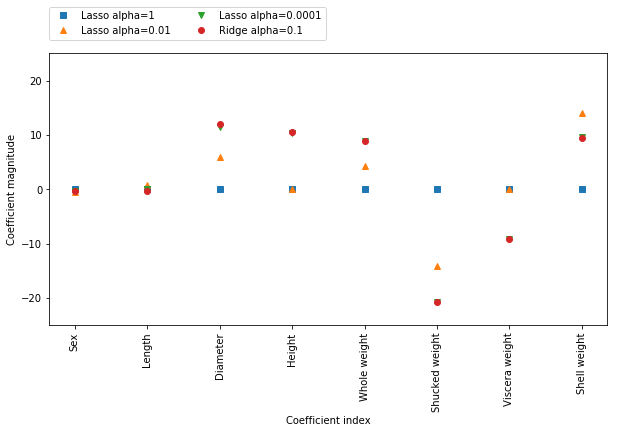

In [190]:
plt.figure(figsize=(10,5))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.xticks(range(len(names)-1), names, rotation=90)
plt.hlines(0, 0, range(len(names)-1))
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## Linear Models for Classification

* Logistic Regression (with L1 or L2 regularization)
$$\underset{w, c}{min\,} \|w\|_1 \quad or\quad \underset{w, c}{min\,} \frac{1}{2}w^T w  \quad + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) .
$$

* Linear Support Vector Machines  (for $x_i \in \mathbb{R}^p, i=1,…, n,$ and $y \in \{1, -1\}^n$)
$$ \min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i \quad \textrm {subject to }\quad  y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i,\\  \zeta_i \geq 0, i=1, ..., n $$



In [179]:
# Reformulate the problem using the Abalone dataset, now binary Male or Female is the target.
#First remove the rows for Sex I (Infant) = 2.

df_bin = df[df.Sex !=2]

# Here we turn into numpy arrays
X_bin = df_bin.iloc[:,1:].values
y_bin = df_bin.iloc[:,0].values

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.562
Test set score: 0.557


In [182]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.560
Test set score: 0.556


In [183]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.540
Test set score: 0.536


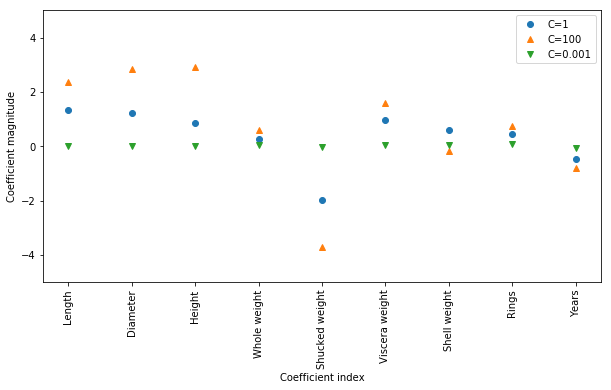

In [189]:
new_names = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings','Years']


plt.figure(figsize=(10,5))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(len(new_names)), new_names, rotation=90)
plt.hlines(0, 0, range(len(new_names)))
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

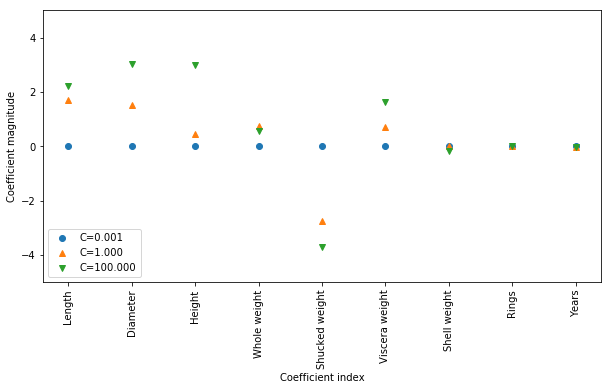

In [198]:
plt.figure(figsize=(10,5))
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    #print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        #C, lr_l1.score(X_train, y_train)))
    #print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        #C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(len(new_names)), new_names, rotation=90)
plt.hlines(0, 0, range(len(new_names)))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)